## Hough Lines Using (y = mx+b) and by iterating through m and b

### imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### main variables

In [88]:
image_path = '../images/road.jpg'
# image_path = '../images/hey.png'

### functions

In [42]:
#Source: https://stackoverflow.com/a/42314798

def plotimage(img, title=None, figsize=None):
    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])    
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

### code

### Read Image

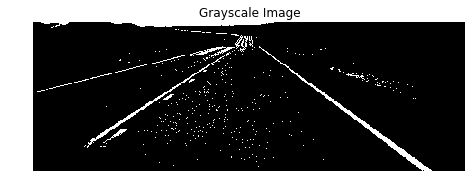

In [106]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold = 100
gray[gray<threshold] = 0
gray[gray>=threshold] = 1
bw = gray
plotimage(bw, 'Grayscale Image')

### Vote

In [91]:
min_m = -50
max_m = -min_m
step_m = 0.1

max_b = 2*max(gray.shape)
min_b = -max_b
step_b = 1

m_vals = np.arange(min_m, max_m, step_m)
b_vals = np.arange(min_b,max_b,step_b)

In [92]:
def draw_line(x,y):
    '''
    Returns a new image where the line b=-x*m+y is drawn on it
    '''
    
    res_im = np.zeros(shape=(len(m_vals),len(b_vals)), dtype='int')
    m0 = m_vals[0]
    m1 = m_vals[-1]
    b0=-x*m0+y
    b1=-x*m1+y

    b0 = int((b0- min_b)/step_b)
    b1 = int((b1- min_b)/step_b)
    m0 = int((m0- min_m)/step_m)
    m1 = int((m1- min_m)/step_m)

    cv2.line(res_im,(b0,m0), (b1,m1),1,1)
    
    return res_im

0.0%
0.6%
1.2%
1.8%
2.4%
3.0%
3.6%
4.2%
4.8%
5.5%
6.1%
6.7%
7.3%
7.9%
8.5%
9.1%
9.7%
10.3%
10.9%
11.5%
12.1%
12.7%
13.3%
13.9%
14.5%
15.2%
15.8%
16.4%
17.0%
17.6%
18.2%
18.8%
19.4%
20.0%
20.6%
21.2%
21.8%
22.4%
23.0%
23.6%
24.2%
24.8%
25.5%
26.1%
26.7%
27.3%
27.9%
28.5%
29.1%
29.7%
30.3%
30.9%
31.5%
32.1%
32.7%
33.3%
33.9%
34.5%
35.2%
35.8%
36.4%
37.0%
37.6%
38.2%
38.8%
39.4%
40.0%
40.6%
41.2%
41.8%
42.4%
43.0%
43.6%
44.2%
44.8%
45.5%
46.1%
46.7%
47.3%
47.9%
48.5%
49.1%
49.7%
50.3%
50.9%
51.5%
52.1%
52.7%
53.3%
53.9%
54.5%
55.2%
55.8%
56.4%
57.0%
57.6%
58.2%
58.8%
59.4%
60.0%
60.6%
61.2%
61.8%
62.4%
63.0%
63.6%
64.2%
64.8%
65.5%
66.1%
66.7%
67.3%
67.9%
68.5%
69.1%
69.7%
70.3%
70.9%
71.5%
72.1%
72.7%
73.3%
73.9%
74.5%
75.2%
75.8%
76.4%
77.0%
77.6%
78.2%
78.8%
79.4%
80.0%
80.6%
81.2%
81.8%
82.4%
83.0%
83.6%
84.2%
84.8%
85.5%
86.1%
86.7%
87.3%
87.9%
88.5%
89.1%
89.7%
90.3%
90.9%
91.5%
92.1%
92.7%
93.3%
93.9%
94.5%
95.2%
95.8%
96.4%
97.0%
97.6%
98.2%
98.8%
99.4%


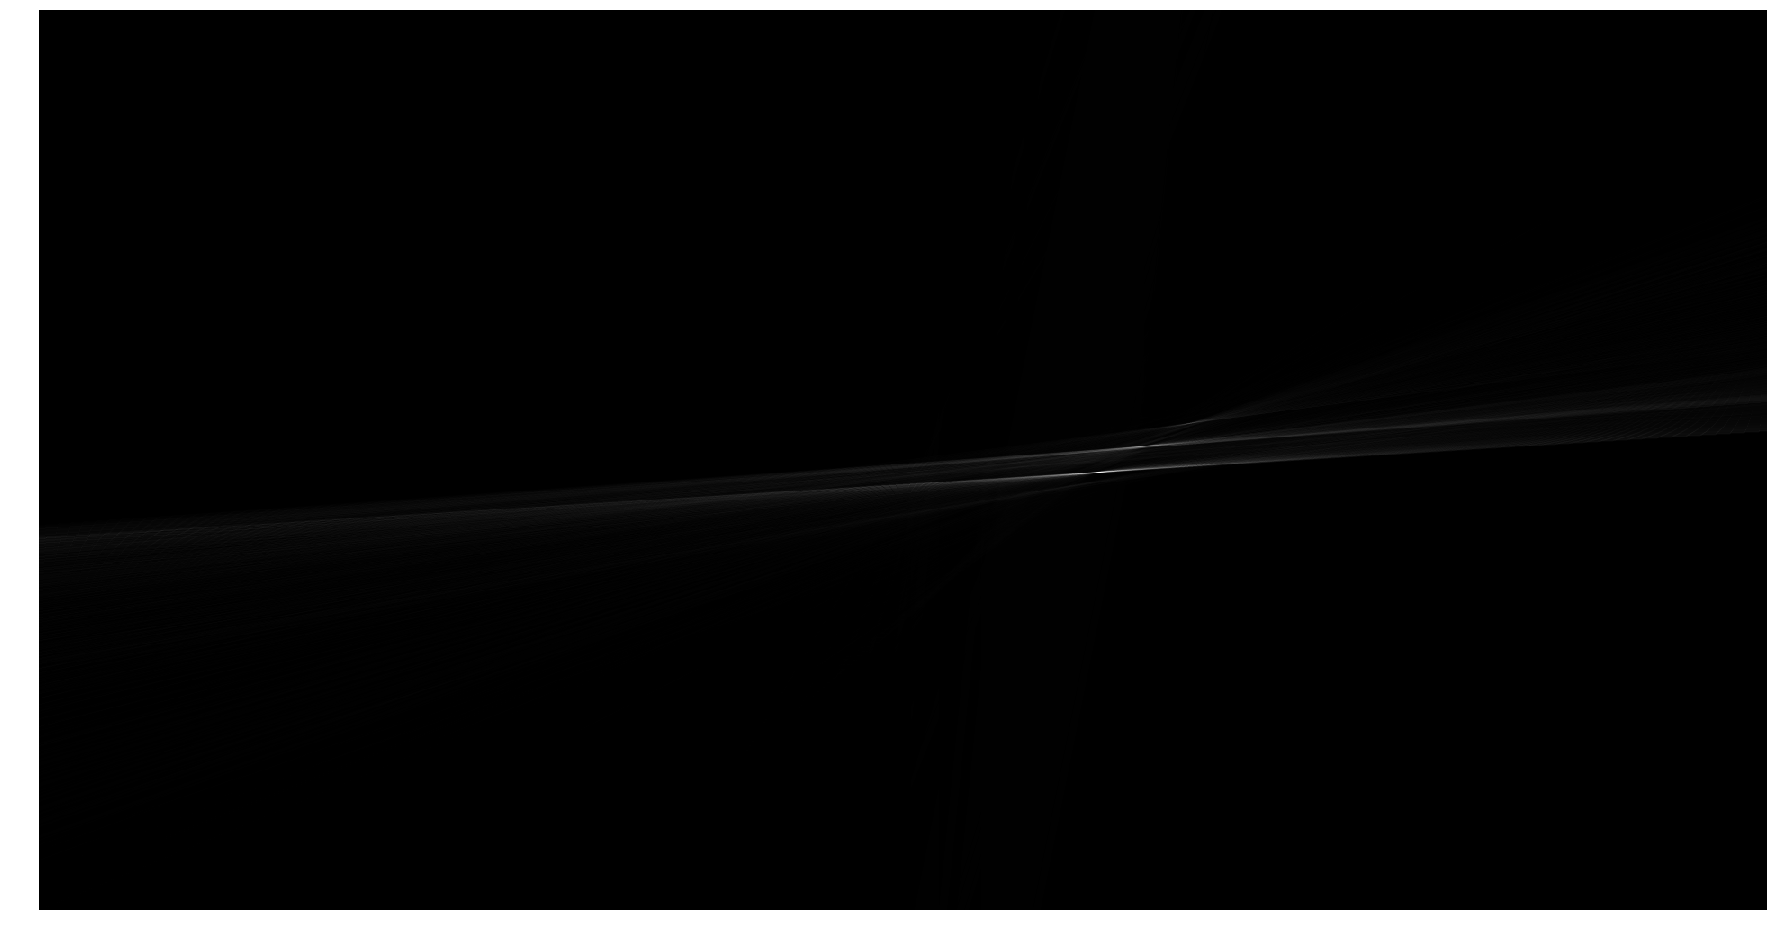

In [93]:
votes = np.zeros(shape=(len(m_vals),len(b_vals)), dtype='int')
for x in range(bw.shape[0]):
    for y in range(bw.shape[1]):
        if bw[x,y]:                        
            mask = draw_line(x,y)
            votes = votes + mask
    percentage = x/bw.shape[0]
    print("{:.1%}".format(percentage))
        
plotimage(votes)

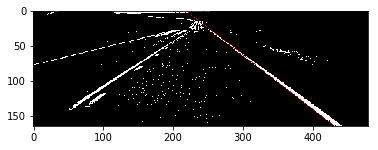

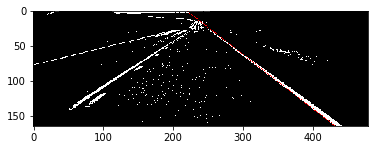

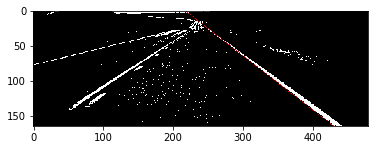

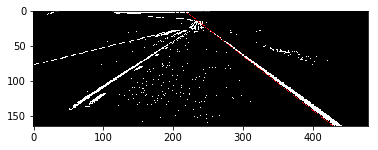

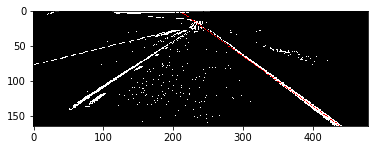

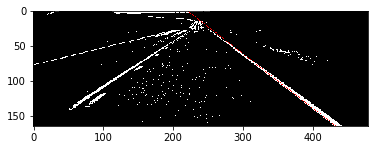

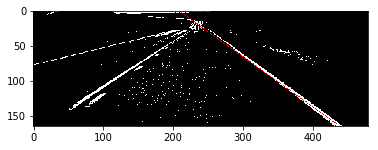

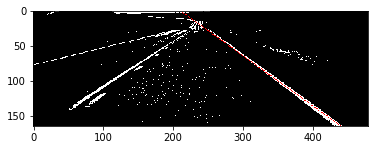

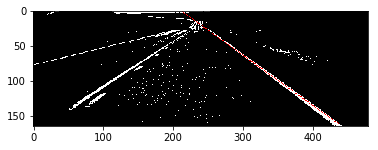

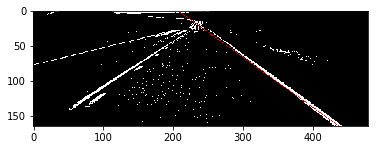

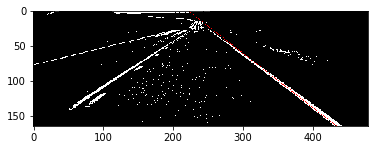

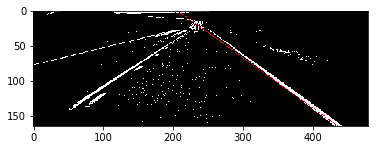

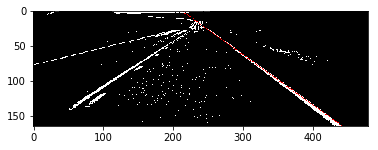

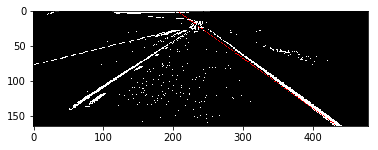

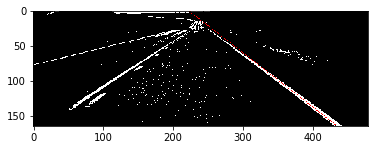

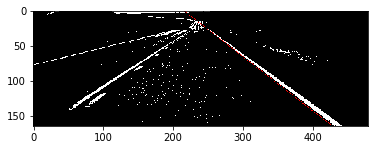

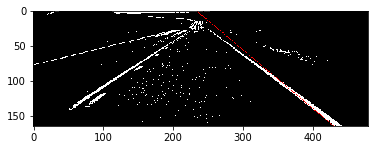

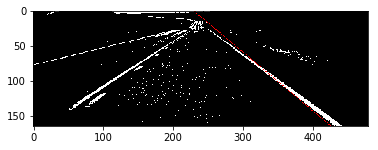

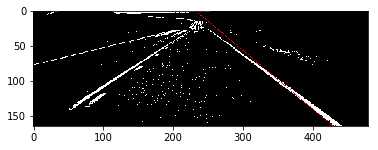

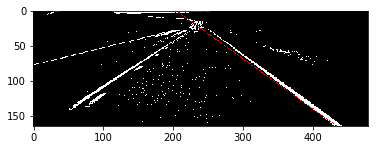

In [94]:
def draw_max(image, votes, color = (255,0,0), skip=False):
    m0,b0 = np.unravel_index(votes.argmax(), votes.shape)
    votes[m0,b0] = 0
    if skip:
        return
    
    b = b0*step_b + min_b
    m = m0*step_m + min_m

    x0 = 0
    x1 = bw.shape[0]
    y0 = int(m*x0 + b)
    y1 = int(m*x1 + b)

    cv2.line(image, (y0,x0), (y1,x1),  color, 1)


image = votes.copy()
for i in range(20):
    colored = cv2.cvtColor(bw*255, cv2.COLOR_GRAY2BGR)
    draw_max(colored, image, (255,0,0), False)
    plt.figure()
    plt.imshow(colored)

### new image with the first N hough lines

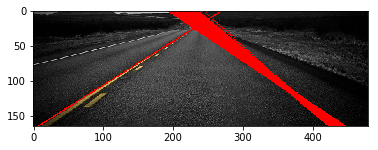

In [109]:
image = votes.copy()
im = img.copy()
for i in range(50):
    draw_max(im, image, 255, False)

plt.figure()
plt.imshow(im)

(1, 2)


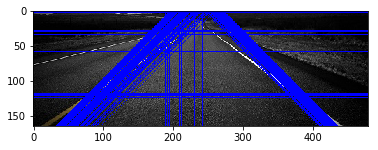

In [108]:
im = img.copy()

lines = cv2.HoughLines(bw, 0.001, np.pi/360, 0)
for i in range(100):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(im,(x1,y1),(x2,y2),(0,0,255),1)

plt.imshow(im)
print(lines[0].shape)